In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('../data/train.csv')
gas = pd.read_csv('../data/gas_prices.csv')
electricity = pd.read_csv('../data/electricity_prices.csv')
client = pd.read_csv('../data/client.csv')
fw = pd.read_csv('../data/forecast_weather.csv')
hw = pd.read_csv('../data/historical_weather.csv')

df_list = {'train': train, 'gas': gas, 'electricity': electricity, 'client': client, 'fw': fw, 'hw': hw}
global_na = 0

## Data Exploration

In [3]:
def describe_df(dataset):
    print("--> Info du dataset :")
    dataset.info()

    print("\n--> Description du dataset :")
    print(dataset.describe())

    global global_na
    dataset_na = dataset.isna().sum()
    global_na += dataset_na.sum()

    print("\n--> Valeurs nulles du dataset :\n", dataset_na)
    print("%s valeurs nulles." % (dataset_na.sum()) if dataset_na.sum() > 0 else "Aucune valeur nulle.")

    ban_list = ["date", "id", "is", "cloudcover", "latitude", "longitude", "hours"]
    mask = dataset.columns.tolist()
    for ban in ban_list:
        mask = [col for col in mask if ban not in col.lower()]

    for column in dataset[mask]:
        sns.histplot(data=dataset, x=column)
        plt.show()

##### Exploration dataset train #####
--> Info du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB

--> Description du dataset :
             county   is_business  product_type        target  is_consumption  \
count  2.018352e+06  2.018352e+06  2.018352e+06  2.017824e+06       2018352.0   
mean   7.297034e+00  5.368261e-01  1.898927e+00  2.748556e+02             0.5   
std    4.780990e+00  4.986421e-01  1.081766e+00  9.095024e+02             0.5   
min    0.000000e+00  0.000000e+00  0.000000e+00

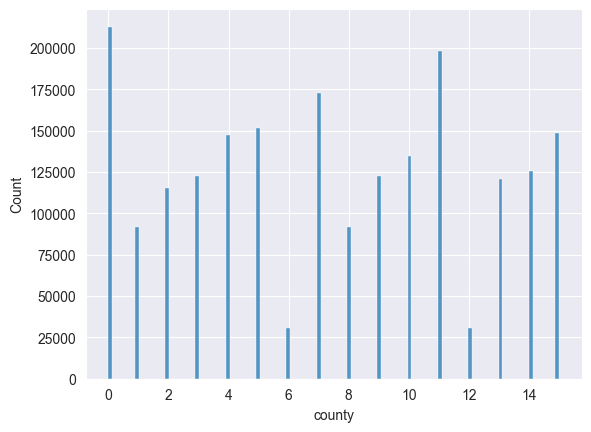

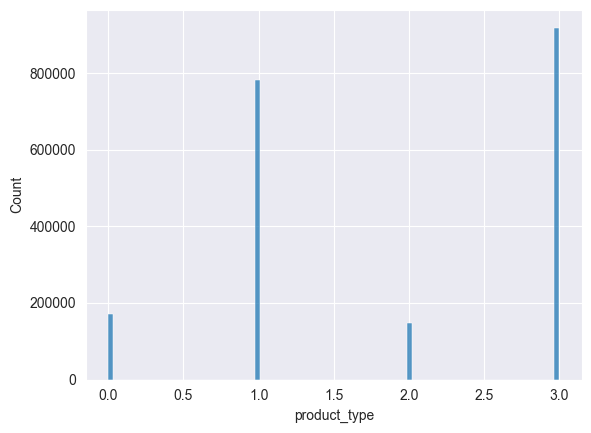

KeyboardInterrupt: 

In [4]:
for df in df_list:
    print("##### Exploration dataset %s #####" % df)
    describe_df(df_list[df])
    print("\n\n")

print("%s valeurs nulles parmis tous les datasets." % global_na)